Before you turn this lab in, make sure everything runs as expected. **Restart and run all cells** (in the menubar, select Kernel$\rightarrow$Restart & Run All) then check the output is as expected and there are no errors.  Also remember to **Save** before uploading this file (File$\rightarrow$Save and Checkpoint).

---

# <div align="center">Quantum Computer Systems Design</div>&nbsp;  <div align="center">Lab 1</div> 

### 1. Quantum Logic Warm-up
How does a quantum computer store and manipulate information? In this problem, we will compare and contrast quantum logic against its classical counterpart, boolean logic.

#### 1.1 Classical coin-flip gate.
Suppose CCOIN is a classical conditional random gate that tosses a biased coin if the input is $|1\rangle$. Specifically, if the input is $|0\rangle$, CCOIN does nothing, otherwise, it generates bit $|0\rangle$ with probability $1/4$ and generates bit $|1\rangle$ with probability $3/4$. Schematically, CCOIN gate takes one input bit and returns one output bit, as shown below:
$$\text{CCOIN} = \begin{cases}|0\rangle \rightarrow |0\rangle, \\ |1\rangle \rightarrow 1/4|0\rangle + 3/4|1\rangle. \end{cases}$$&nbsp;
Notice that, in our notation, a *random bit* is written as $p|0\rangle+(1-p)|1\rangle$, if it is $|0\rangle$ with probability $p$ and generates bit $|1\rangle$ with probability $1-p$.

#### 1.1.1
Give the random bit resulting from applying the CCOIN gate on an input bit $1/3|0\rangle+2/3|1\rangle$. Enter your solution below by giving the probability of outputing $|0\rangle$.

For all questions, you may either give a numeric answer such as `0.2928932188` or an expression like `1-np.sin(np.pi/4)`

In [1]:
import numpy as np

prob_output_0 = (
    0.5
)
print(prob_output_0)

0.5


In [2]:
# Do not delete this cell
# The autograder will test the value stored in prob_output_0
# Pass all the below test(s) and the hidden tests for full credit
assert 0 <= prob_output_0 <= 1, 'The probability should be between 0 and 1'

#### 1.1.2 
Give the random bit resulting from applying the CCOIN gate *twice* on an input bit $2/5|0\rangle+3/5|1\rangle$. Enter your solution below by giving the final probability of outputing $|0\rangle$. 

In [4]:
prob_twice_0 = 53/80

print(prob_twice_0)

0.6625


In [5]:
# Do not delete this cell
# Pass all the below test(s) and the hidden tests for full credit
assert 0 <= prob_twice_0 <= 1, 'The probability should be between 0 and 1'

#### 1.2 Classical Coin to Quantum Coin
Given our definition of the CCOIN gate, we need to implement a biased coin. The following simple classical program invokes a pseudo random generator in `numpy.random`. (Feel free to execute the following code to see the sampling outcome.)

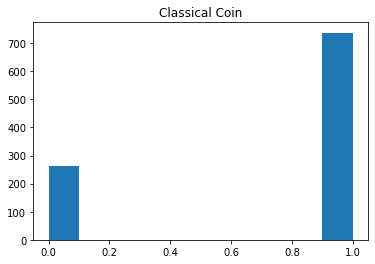

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def coin_classical():
    return np.random.choice([0,1], p=[1./4, 3./4])
        
counts_classical = [coin_classical() for _ in range(1000)]
plt.hist(counts_classical, 10, histtype='bar')
plt.title('Classical Coin')
plt.show()

#### 1.2.1 
Now, suppose we want to implement a quantum coin. Give a quantum circuit that implements the same biased coin from above, that is the measurement outcome of a qubit is bit $|0\rangle$ with probability $1/4$ and bit $|1\rangle$ with probability $3/4$. You may use up to *two* qubits (initialized to $|00\rangle$) and any built in gates. (Hint: you may want a controlled-Hadamard gate: `CHGate`)

In [42]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

# Maximum of two qubits are allowed.
# Measure only one of the qubits.
coin_quantum = QuantumCircuit(2, 1)
# coin_quantum = QuantumCircuit(2, 2)

# Write your quantum coin program here:
# YOUR CODE HERE
coin_quantum.h(0)
coin_quantum.ch(0, 1)
coin_quantum.x(1)
# coin_quantum.measure([0, 1],[0, 1])
coin_quantum.measure([1],[0])

coin_quantum.draw(fold=-1)

┌───┐             
q_0: ┤ H ├──■──────────
     └───┘┌─┴─┐┌───┐┌─┐
q_1: ─────┤ H ├┤ X ├┤M├
          └───┘└───┘└╥┘
c: 1/════════════════╩═
                     0

Sampled outcomes: {'1': 742, '0': 258}


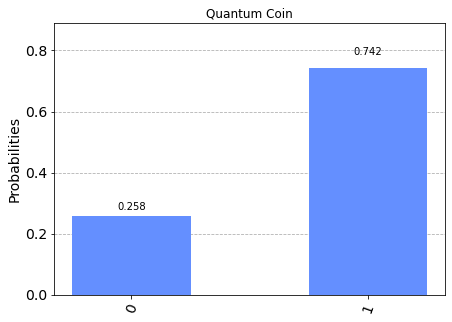

In [43]:
# Testing your circuit
simulator = Aer.get_backend('qasm_simulator')  # Use the simulator from qiskit Aer

result = execute(coin_quantum, simulator, shots=1000).result()
counts_quantum = result.get_counts(coin_quantum)
print('Sampled outcomes:', counts_quantum)
plot_histogram(counts_quantum, title='Quantum Coin')

In [44]:
# Do not delete this cell
# Pass all the below test(s) and the hidden tests for full credit
assert len(coin_quantum) > 0, 'Empty circuit, add gates with coin_quantum.<gate_name>(q0, ...)'
assert len(counts_quantum) == 2, 'The circuit should have two possible outcomes'
assert 220 <= counts_quantum['0'] <= 280, 'Probability of |0> should be 1/4'
assert 720 <= counts_quantum['1'] <= 780, 'Probability of |1> should be 3/4'

### 2. Quantum Logic Gates
In this problem, we will review single-qubit quantum gates, and their action on the three principal axes of spin measurement, i.e. $\hat{x}$, $\hat{y}$, and $\hat{z}$. Using the notation in lecture, we denote the pair of eigen-states in each axis as follows: 
* $(|+\rangle, |-\rangle)$ for $\hat{x}$ axis,
* $(|i\rangle, |-i\rangle)$ for $\hat{y}$ axis,
* $(|0\rangle, |1\rangle)$ for $\hat{z}$ axis.

where $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle), |-\rangle = \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle), |i\rangle = \frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle), |-i\rangle = \frac{1}{\sqrt{2}}(|0\rangle-i|1\rangle).$

#### 2.1 Clifford Gates
The single-qubit Clifford gates can be viewed as a map from one eigen-state to another eigen-state. As such, the action of a Clifford gate can be described as how the gate transforms the three eigen-states respectively. For example, for a Hadamard gate and an S gate:
* H gate: $(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|0\rangle, |-i\rangle, |+\rangle)$,
* S gate: $(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|i\rangle, |-\rangle, |0\rangle)$. 

Feel free to verify this mapping by manipulating and executing the code block below.

In [ ]:
from math import sqrt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
simulator = Aer.get_backend('statevector_simulator')

qc21demo = QuantumCircuit(1)

initial_x = [1/sqrt(2), 1/sqrt(2)] # define initial state as |+>
qc21demo.initialize(initial_x, 0)
qc21demo.h(0)
state = execute(qc21demo, simulator).result().get_statevector() # execute circuit
print(state) # show amplitudes

#### 2.1.1
Give the sequence of Hadamard gates and S gates which produces the following map. If the map is not possible, leave the quantum circuit blank.
$$(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|0\rangle, |+\rangle, |i\rangle)$$

In [ ]:
qc211 = QuantumCircuit(1)

# Write your quantum gates here:
# Example:
# qc211.s(0)
# qc211.h(0)
# YOUR CODE HERE

qc211.draw(fold=-1)

In [ ]:
# Do not delete this cell
# Testing your circuit
# Validate
assert set(g.__class__.__name__ for g, _, _ in list(qc211)
          ).issubset({'HGate', 'SGate'}), (
    'You may only use H and S gates for this problem')

# Simulate every input and check the output
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.quantum_info.operators.predicates import matrix_equal
simulator = Aer.get_backend('statevector_simulator')
test_states = {
    '+': [1/sqrt(2), 1/sqrt(2)], '-': [1/sqrt(2), -1/sqrt(2)],
    'i': [1/sqrt(2), 1j/sqrt(2)], '-i': [1/sqrt(2), -1j/sqrt(2)],
    '0': [1, 0], '1': [0, 1],
}
expected_transform = {
    '+': '0', 'i': '+', '0': 'i',
    '-': '1', '-i': '-', '1': '-i',
}
invalid = False
for input_name, output_name in expected_transform.items():
    #print(f'Testing input |{input_name}> with expected output |{output_name}>...')
    # Simulate
    qc_test = QuantumCircuit(1)
    qc_test.initialize(test_states[input_name], 0)
    qc_test += qc211
    state = execute(qc_test, simulator).result().get_statevector() # execute circuit
    state_name = str(state)
    for comp_name, comp_state in test_states.items():
        if matrix_equal(state, comp_state,
                        ignore_phase=True, atol=1e-8, rtol=1e-8):
            state_name = comp_name
    if state_name == output_name:
        print(f'Correct:   |{input_name:>2}> -> |{output_name:>2}>')
    else:
        invalid = True
        print(f'Incorrect: |{input_name:>2}> -> |{state_name:>2}> (expected {output_name:>2})')
assert not invalid, 'At least one output of your circuit is wrong.'

#### 2.1.2
Give the sequence of Hadamard gates and S gates which produces the following map. If the map is not possible, leave the quantum circuit blank.
$$(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|+\rangle, |-i\rangle, |1\rangle)$$

In [ ]:
qc212 = QuantumCircuit(1)

# Write your quantum gates here:
# YOUR CODE HERE

qc212.draw(fold=-1)

In [ ]:
# Do not delete this cell
# Testing your circuit
# Validate
assert set(g.__class__.__name__ for g, _, _ in list(qc212)
          ).issubset({'HGate', 'SGate'}), (
    'You may only use H and S gates for this problem')

# Don't forget to test that your circuit has the correct output for every input

#### 2.1.3
Give the sequence of Hadamard gates and S gates which produces the following map. If the map is not possible, leave the quantum circuit blank.
$$(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|0\rangle, |i\rangle, |+\rangle)$$

In [ ]:
qc213 = QuantumCircuit(1)

# Write your quantum gates here:
# YOUR CODE HERE

qc213.draw(fold=-1)

In [ ]:
# Do not delete this cell
# Testing your circuit
# Validate
assert set(g.__class__.__name__ for g, _, _ in list(qc213)
          ).issubset({'HGate', 'SGate'}), (
    'You may only use H and S gates for this problem')

# Don't forget to test that your circuit has the correct output for every input

#### 2.1.4
Give the sequence of Hadamard gates and S gates which produces the following map. If the map is not possible, leave the quantum circuit blank.
$$(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|1\rangle, |i\rangle, |+\rangle)$$

In [ ]:
qc214 = QuantumCircuit(1)

# Write your quantum gates here:
# YOUR CODE HERE

qc214.draw(fold=-1)

In [ ]:
# Do not delete this cell
# Testing your circuit
# Validate
assert set(g.__class__.__name__ for g, _, _ in list(qc214)
          ).issubset({'HGate', 'SGate'}), (
    'You may only use H and S gates for this problem')

# Don't forget to test that your circuit has the correct output for every input

#### 2.1.5
Give the sequence of Hadamard gates and S gates which produces the following map. If the map is not possible, leave the quantum circuit blank.
$$(|+\rangle, |i\rangle, |0\rangle) \rightarrow (|1\rangle, |-\rangle, |i\rangle)$$

In [ ]:
qc215 = QuantumCircuit(1)

# Write your quantum gates here:
# YOUR CODE HERE

qc215.draw(fold=-1)

In [ ]:
# Do not delete this cell
# Testing your circuit
# Validate
assert set(g.__class__.__name__ for g, _, _ in list(qc215)
          ).issubset({'HGate', 'SGate'}), (
    'You may only use H and S gates for this problem')

# Don't forget to test that your circuit has the correct output for every input